# Data Science Project: Planning Stage (Individual)
Name: Jessica Lu (99359523)

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [6]:
players_summary <- summary(players)
players_summary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [14]:
sessions_summary <- summary(sessions)
sessions_summary

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

# (1) Data Description

### Players dataset - players.csv
- 196 observations
- Summary statistics
    - Average played_hours: 5.85 hours
    - Average Age: 21.14 years old
- 7 variables

|Variable name | Type | Meaning|
|:-------------|:----|:-------|
|experience|Character| Player’s experience in the game|
|          |         |- Amateur|
|          |         |- Beginner|
|          |         |- Regular|
|          |         |- Pro|
|          |         |- Veteran|
|subscribe|Logical|Player’s subscription status in the gaming newsletter|
|         |       |- TRUE|
|         |       |- FALSE|
|hashedEmail|Character|Player’s hashed email address|
|played_hours|Double|Players’s total number of hours played in one session|
|name|Character|Player’s name|
|gender|Character|Player’s gender|
|||- Female|
|||- Male|
|||- Non-binary|
|||- Two-Spirited|
|||- Agender|
|||- Prefer not to say|
|||- Other|
|Age|Double|Player’s age|

- Potential issues that I cannot see
    - The total number of played hours may not be fully accurate. The player could have stepped away from the screen and left the game running, prolonging the recorded hours.
    - The age of the players may not be accurate as players can choose to answer untruthfully, which may impact calculating the target audience ages.

### Sessions dataset - sessions.csv
- 1535 observations
- Summary statistics
    - Average original_start_time: 1.72e+12
    - Average original_end_time: 1.72e+12
- 5 variables

|Variable name | Type | Meaning|
|:-------------|:----|:-------|
|hashedEmail|Character|Player’s hashed email address|
|start_time|Character|Date and timestamp of player’s start time of the game (DD/MM/YY and timestamp)|
|end_time|Character|Date and timestamp of player’s end time of the game (DD/MM/YY and timestamp)|
|original_start_time|Double|Start time in UNIX time in milliseconds|
|original_end_time|Double|End time in UNIX time in milliseconds|

- Potential issues that I cannot see
    - The start and end time and original start and end time may not be accurate because the player could have stepped away from the screen, prolonging the recorded time.

# (2) Question

#### **Broad question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### **Specific question**: Can the variables experience, number of hours played, and age predict a player’s newsletter subscription in the players dataset?

The players dataset will help me address the question of interest because it includes data about the players’ characteristics (experience, gender, and age) and behaviour (number of hours played). Their names and hashed emails do not help since the information is not directly related to the game and subscription choice. To determine how these features differ between various player types, I can split the data by player type (5 levels of experience) and apply a predictive method to each group separately. After, I can report the model’s accuracy estimate and standard error to observe its accuracy in predicting a player’s subscription. 

# (3) Exploratory Data Analysis and Visualization

In [27]:
players_mean <- players |>
    mutate(played_hours_mean = mean(played_hours, na.rm = TRUE)) |>
    mutate(age_mean = mean(Age, na.rm = TRUE)) |>
    select(played_hours_mean, age_mean)|>
    slice(1)
players_mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


#### Graph #1

The bar graph named **players_experience_histogram** plots the player’s experience in the game and is color-coded with their subscription status.
- More players subscribe than don’t subscribe.
- The total number of Amateurs > Veterans > Regulars > Beginners > Pros.


Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


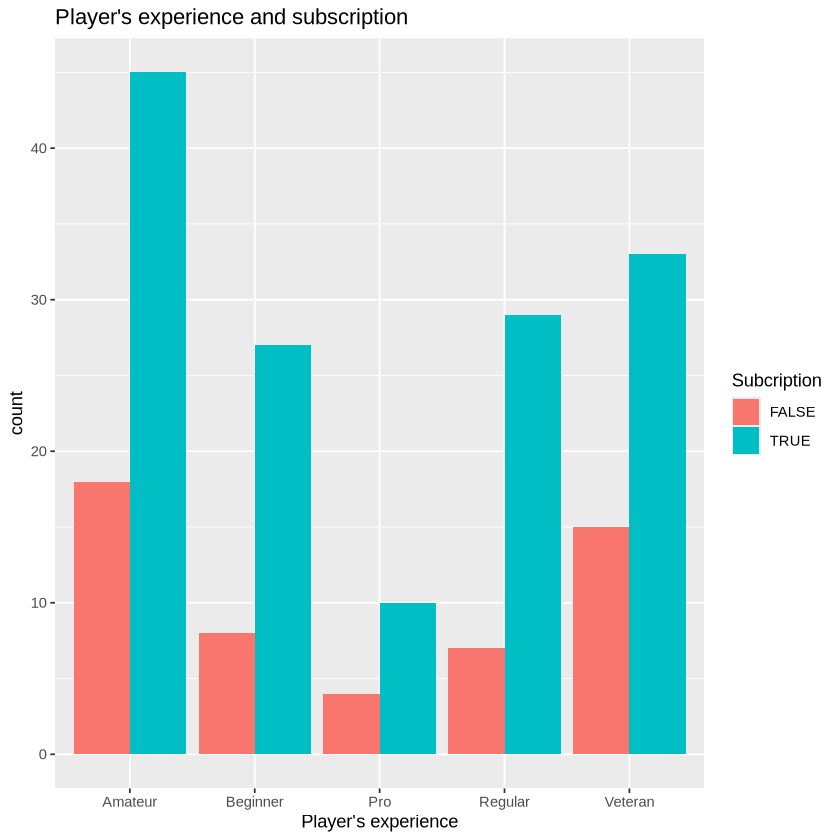

In [26]:
# Graph 1

players_experience_histogram <- players |>
    ggplot(aes(x = experience, fill = as_factor(subscribe))) +
    geom_histogram(stat = "count", position = "dodge") +
    labs(x = "Player's experience", fill = "Subcription", title = "Player's experience and subscription")
players_experience_histogram

### Graph #2

The bar graph named **players_experience_histogram** plots the player’s gender and is color-coded with their subscription status.
- More players subscribe than don’t subscribe.
- The total number of Male > Female > Non-binary > Prefer not to say > Two-spirited > Agender > Other.
- There is a significantly greater number of male players than compared to other genders, so the predictor result will be heavily influenced by male players if gender is used as a predictor variable.


Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


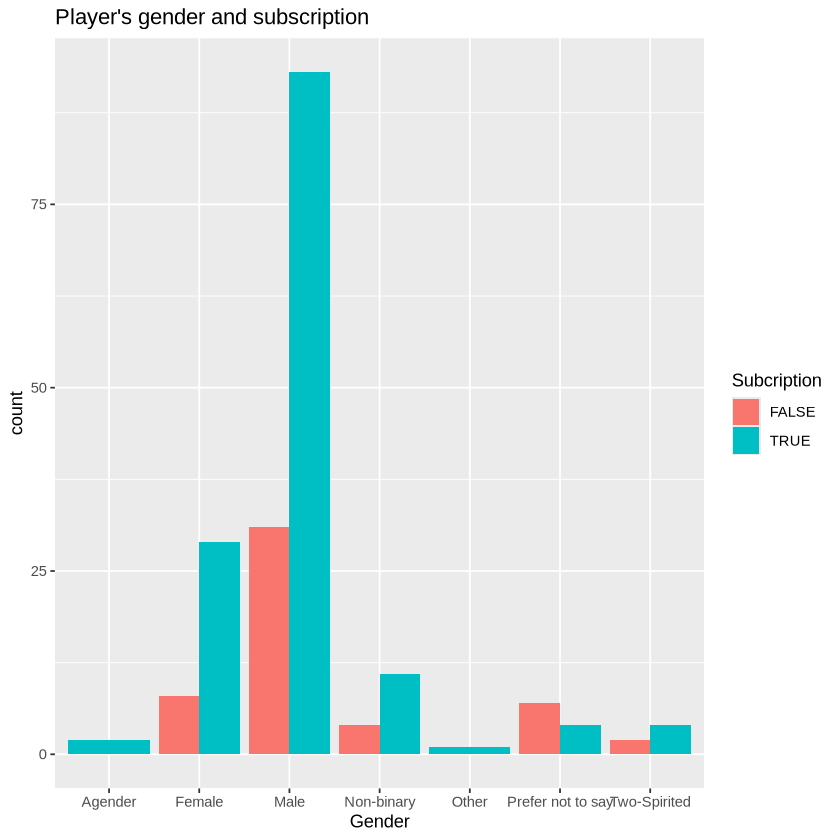

In [25]:
# Graph 2

players_gender_histogram <- players |>
    ggplot(aes(x = gender, fill = as_factor(subscribe))) +
    geom_histogram(stat = "count", position = "dodge") +
    labs(x = "Gender", fill = "Subcription", title = "Player's gender and subscription")
players_gender_histogram

### Graph #3

The scatter plot named **players_age_hours** plots the player’s age vs. number of hours played and is color-coded with their subscription status.
- More players subscribe than don’t subscribe.
- This graph does not resemble a linear relationship. The points of the plot cluster under the age of 30 and under 75 hours of play.
- There are not a large number of points on the graph. It may be difficult to build an accurate model with fewer observations.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


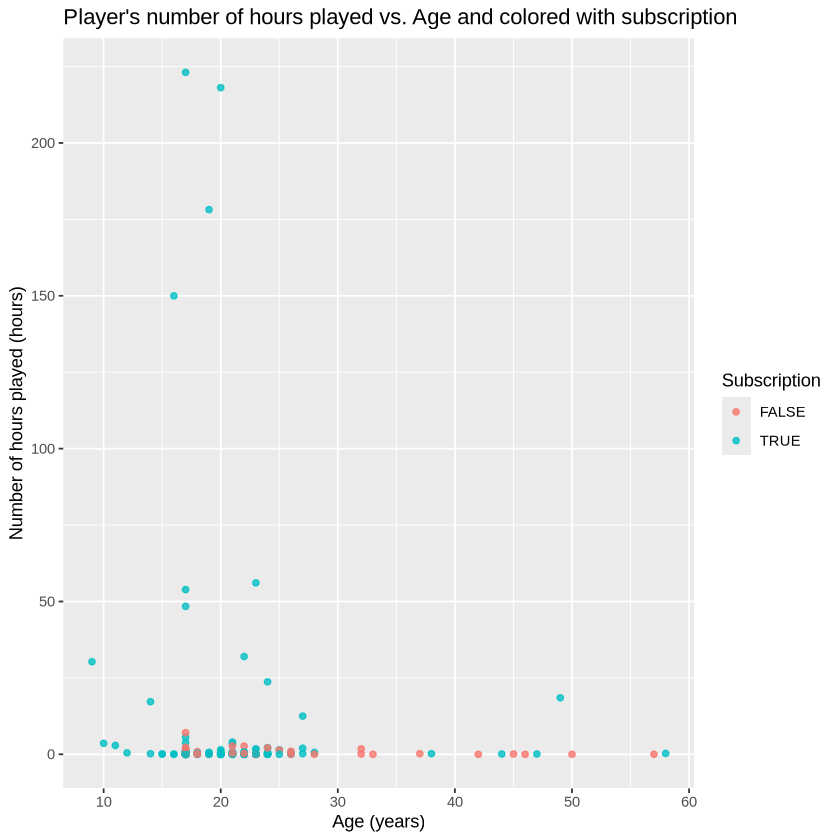

In [4]:
# Graph 3

players_age_hours <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.8) +
    labs(x = "Age (years)", y = "Number of hours played (hours)", color = "Subscription", title = "Player's number of hours played vs. Age and colored with subscription")
players_age_hours

# (4) Methods and Plan

We can use K-nearest neighbors classification and use the predictor variables, experience, number of hours played, and age, to predict a player’s newsletter subscription in the players dataset. This method is appropriate because it predicts the value of a categorical variable of interest. In this project, the categorical variable is subscription and its values are “TRUE” and “FALSE”.

To apply k-NN classification, it is assumed that the data is standardized (centered and scaled), all predictors are equally important, and all missing data are removed and imputed by their mean values based on other observations in the dataset. 

#### Limitations

1. The k-NN classification model requires variables with numerical values, which only the variables played_hours and Age satisfy. Hence, using gender as a predictor is not possible unless changed to a numerical format.

2. The number of observations for the 5 datasets (corresponding to the player’s experience) range from 14 to 63. This will limit the amount of cross-validation folds on each training set, which limits the number of times certain K values are tested, affecting the accuracy of the model. For example, the "Pro" dataset only has 14 observations. Splitting 14 observations into training and testing data and performing a 5 fold cross validation will result in ~2 observations to test on. Because k-NN computes the distance between the new observation and each observation in the training set, it is difficult to perform without a large dataset. Thus, due to limited data, cross validation will only be used for observations > 30.

#### Process

Firstly, split the data according to the players’ experience in the game (Amateur, Beginner, Regular, Pro, Veteran). This will create 5 datasets. To compare and select the model for each dataset:

1. Use 80% of the training data for the training set and 20% for the validation set.
2. Create a 5 fold cross validation on the training data for the datasets > 30 observations.
3. Preprocessing - create a recipe and standardize the data. Played_hours has a larger scale than Age because its values range from 0 to 223.10 hours while Age ranges from 9 to 58 years old.
4. Create a model specification with neighbours = tune(). For the “Pro” dataset, use K = 2 because it does not have enough data to be tuned.
5. Add the recipe and model to a workflow and use the tune_grid function on the train/validation splits to estimate the accuracy for a range of K values (K = 1 to 10 due to limited data).
6. Create a new model specification with the best K value and retrain the classifier.

#### Conclusion

Using each dataset’s model with the best K value, apply it to the testing set and compute for its accuracy estimate and standard error when predicting a player’s subscription. To predict how different ages and number of hours played can affect subscription change among various player types, input various values for played hours and age in each model. From the results, there may be a different relationship between played hours vs. subscription and/or age vs. subscription for each player type.

However, referring back to the broad question, we cannot use this model to predict what specific characteristics and behaviours are most predictive of subscription because it is only capable of predicting a value from the categorical variable. Furthermore, the players dataset is small, making it difficult to create an accurate model.

In [44]:
players_amateur <- filter(players, experience == "Amateur") |>
nrow()

players_beginner <- filter(players, experience == "Beginner")|>
nrow()

players_regular <- filter(players, experience == "Regular")|>
nrow()

players_pro <- filter(players, experience == "Pro")|>
nrow()

players_veteran <- filter(players, experience == "Veteran")|>
nrow()

players_amateur
players_beginner
players_regular
players_pro
players_veteran

[1] 63

[1] 35

[1] 36

[1] 14

[1] 48